In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples= 1000,n_features=2,n_targets=1,noise=0.3)

In [5]:
X

array([[ 0.25136631, -0.04227629],
       [ 0.57022759,  1.59338453],
       [ 0.67667186,  0.61458832],
       ...,
       [-0.16053643,  0.37898715],
       [ 0.13254917,  0.73278503],
       [ 0.07224955, -0.63741782]])

In [6]:
y

array([ 3.77281253e+00,  6.99865855e+01,  3.48437519e+01, -2.91189842e+01,
        5.54647052e+00,  8.15548687e+01, -1.72722743e+01, -4.58700164e+01,
       -2.54523084e+01,  8.54251955e+01,  3.79154505e+01, -3.77579158e+01,
       -1.84317899e+01,  2.95898738e+01,  1.01532158e+02, -1.23532701e+01,
        4.53384939e+01,  6.80314951e+01, -4.90344668e+01,  1.87791876e+01,
       -9.21519131e+00,  8.79856858e+00,  3.87189811e+01, -6.20622439e+01,
        7.02539604e+01, -4.07732472e+01,  2.21161903e+01, -7.15219412e+01,
        2.08910110e+00, -5.35638389e+00,  1.43106234e+01, -9.60524492e+01,
       -3.72356464e+01, -2.10342738e+01,  5.95349043e+00, -2.26864256e+01,
       -2.55427995e+00,  8.10171957e+01,  1.90598621e+01, -6.18413685e+01,
        2.71961596e+00, -3.57684632e+01,  1.03460798e+02,  3.68981745e+00,
       -3.10991688e+01,  2.20813994e+01,  9.23952728e+00, -2.23360459e+01,
       -4.90737611e+01, -2.50214619e+01,  1.11712112e+01, -7.00275364e+00,
       -3.01306683e+01,  

<Axes: xlabel='0', ylabel='1'>

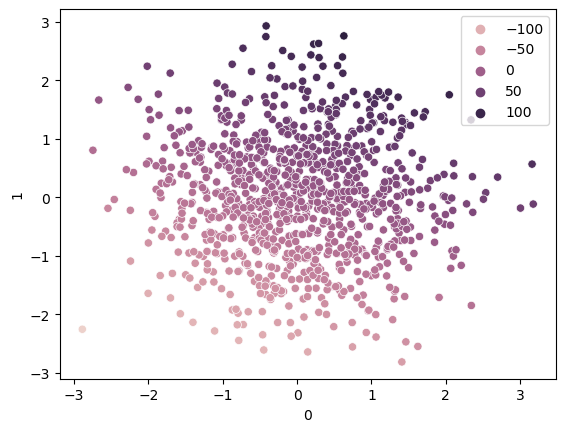

In [7]:
sns.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1],hue = y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel = 'linear')

In [13]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[18.3096317 , 37.19379478]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))
print(r2_score(y_pred,y_test))

0.9999479127735753
0.9999478404560183


## Hyperparameter tuning with SVR

In [20]:
# [CV 4/5] END C=1000, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   1.8s

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear'],'epsilon':[0.1,0.2,0.3]}

In [21]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit = True,cv = 5,verbose=3)

<IPython.core.display.Javascript object>

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/

[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   

[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5]

[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   0.6s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   0.8s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   0.8s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   0.7s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   0.9s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   0.6s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.8s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.8s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.7s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.9s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=li

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
y_pred_grid = grid.predict(X_test)

In [25]:
print(r2_score(y_test,y_pred_grid))


0.9999484268275916


In [1]:
from sklearn.tree import export_graphviz
